In [57]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
test_df = pd.read_csv("logp_sorted_fcv_results_RF_testing batches.csv")
test_df

,testing batch,Standardized_SMILES,y_true,y_preds,LogP
0,1,CCCCCCCCCCCCCCCCOS(=O)(=O)O,78.0,80.444090,5.2871
1,1,ClC1=C(Cl)C2(Cl)C3C4C=CC(C4)C3C1(Cl)C2(Cl)Cl,-15.0,34.323654,5.2702
2,1,CSC(=O)c1c(C(F)F)nc(C(F)(F)F)c(C(=O)SC)c1CC(C)C,44.8,58.026980,5.2429
3,1,C=C(C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,9.4,53.965190,5.2346
4,1,O=C(O)Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1,105.0,79.763730,5.2300
...,...,...,...,...,...
873,9,O=C(NCNC(=O)Nc1c(O)[nH]c(=O)n1CO)Nc1c(O)[nH]c(...,20.5,69.525085,-3.1223
874,9,O=C(C(=O)C(O)O)C(O)O,19.0,21.132986,-3.2540
875,9,O=C(NCO)N(CO)c1c(O)n(CO)c(=O)n1CO,9.7,71.481316,-3.3294
876,9,OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O,8.1,40.118248,-5.3956


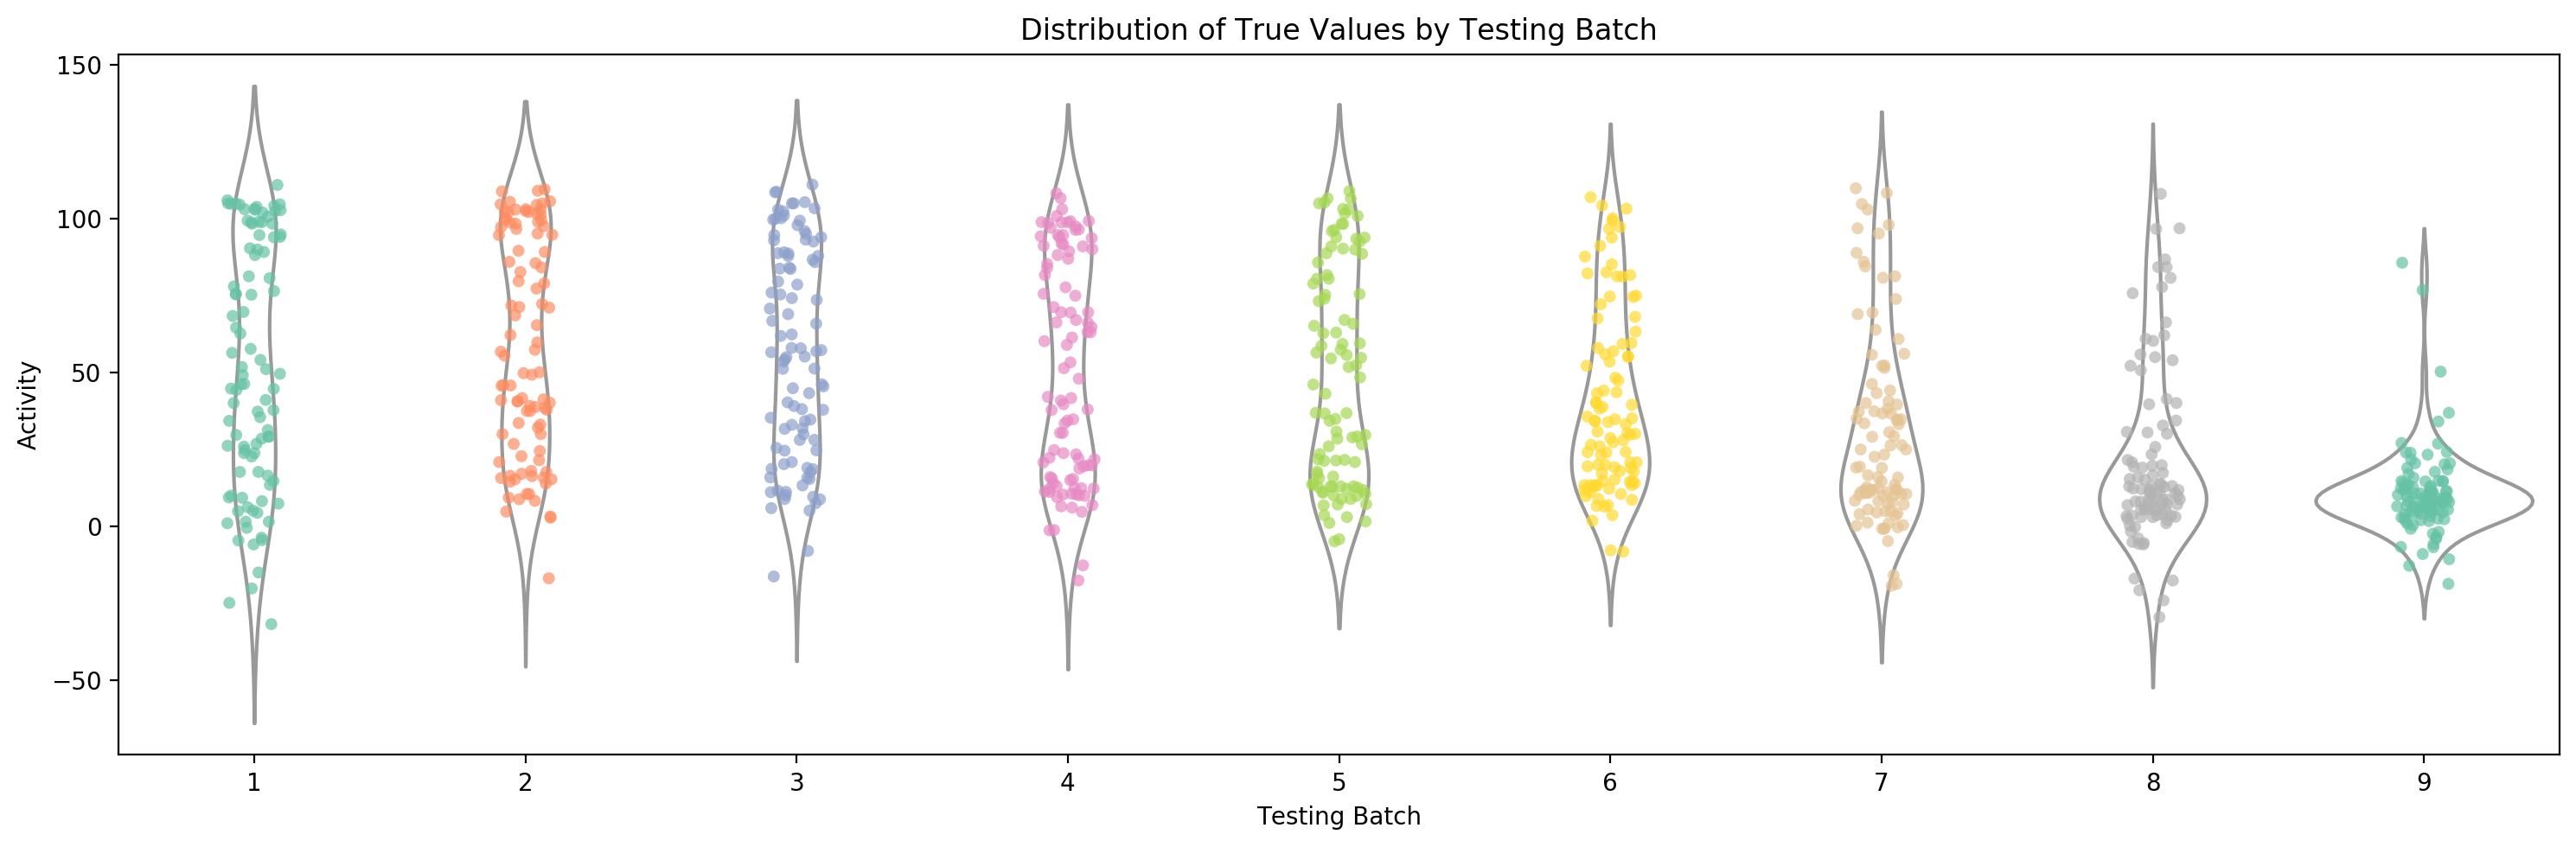

In [59]:
def dist_test_batches(df):

    # Create the violin plot with color set to 'white'
    plt.figure(figsize=(15, 5), dpi=200)
    ax = sns.violinplot(x='testing batch', y='y_true', data=df, color='white', inner=None)

    # Overlay scatter points on top of the violin plot
    sns.stripplot(x='testing batch', y='y_true', data=df, palette='Set2', jitter=True, 
                  color='black', alpha=0.7, ax=ax)

    plt.xlabel('Testing Batch')
    plt.ylabel('Activity')
    plt.title('Distribution of True Values by Testing Batch')
    plt.tight_layout()
    plt.show()
    
dist_test_batches(test_df)

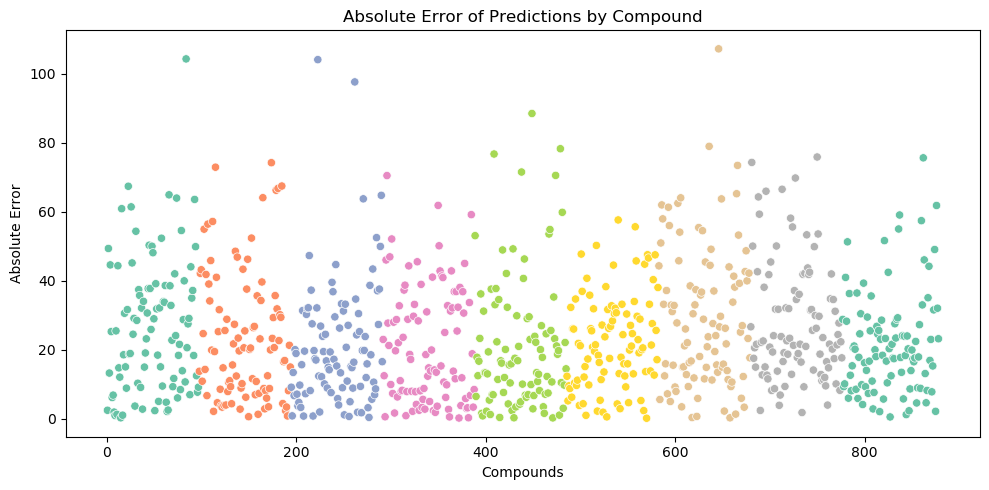

In [60]:
def extrapolation_error(df):
    
    df['AbsoluteError'] = abs(df['y_true'] - df['y_preds'])
    # Assign a continuous index to compounds
    df['CompoundIndex'] = range(1, len(df) + 1)

    # Create the scatter plot
    plt.figure(figsize=(10, 5), dpi=100)

    # Scatter plot with continuous x-axis
    sns.scatterplot(x='CompoundIndex', y='AbsoluteError', hue='testing batch', 
                    data=df, palette='Set2', legend=False)

    plt.xlabel('Compounds')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error of Predictions by Compound')
    plt.tight_layout()
    plt.show()

extrapolation_error(test_df)

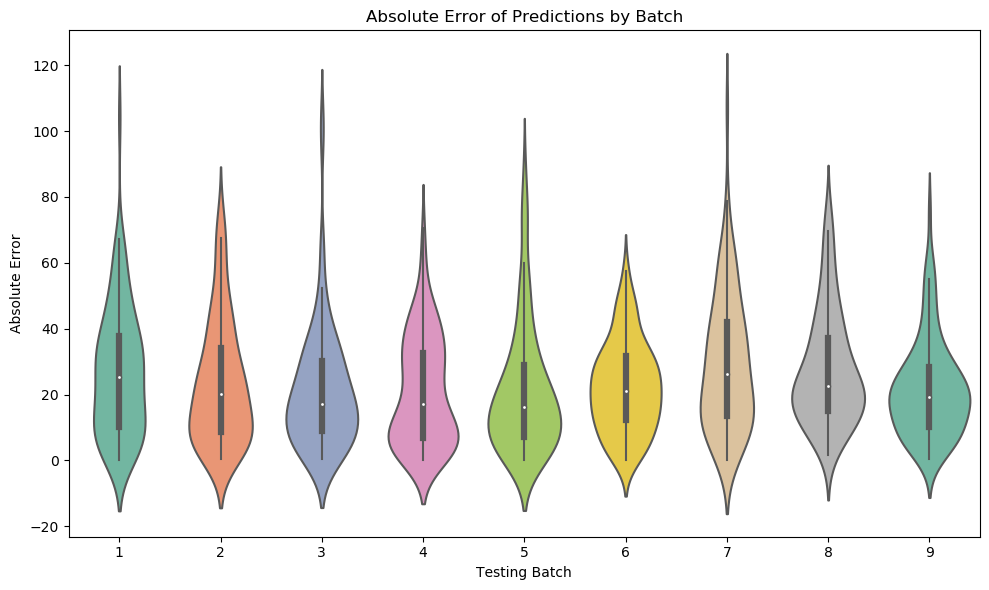

In [61]:
def extrapolation_error_violin(df):
    # Calculate absolute error
    df['AbsoluteError'] = abs(df['y_true'] - df['y_preds'])
    
    # Create the violin plot
    plt.figure(figsize=(10, 6), dpi=100)
    
    sns.violinplot(x='testing batch', y='AbsoluteError', data=df, palette='Set2')
    
    plt.xlabel('Testing Batch')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error of Predictions by Batch')
    plt.tight_layout()
    plt.show()

extrapolation_error_violin(test_df)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# DataFrame to store results
results = []

for batch, group in test_df.groupby('testing batch'):
    rmse = np.sqrt(mean_squared_error(group['y_true'], group['y_preds']))
    r_squared = r2_score(group['y_true'], group['y_preds'])

    # Collect results in the DataFrame
    results.append({
    'Method': "Sorted_SFCV",
    'Testing Batch': batch,
    'RMSE': rmse,
    'R2': r_squared,
    })

# Convert the list of dictionaries to a DataFrame
final_results = pd.DataFrame(results)
# Save the DataFrame to a CSV file
final_results.to_csv('metrics/metrics_sortedforwardCV.csv', index=False)
final_results

,Method,Testing Batch,RMSE,R2
0,Sorted_SFCV,1,33.001866,0.317402
1,Sorted_SFCV,2,30.064144,0.284642
2,Sorted_SFCV,3,27.927496,0.329965
3,Sorted_SFCV,4,26.725894,0.444590
4,Sorted_SFCV,5,28.517169,0.337017
5,Sorted_SFCV,6,26.246748,0.217031
6,Sorted_SFCV,7,35.728919,-0.334884
7,Sorted_SFCV,8,32.660548,-0.328999
8,Sorted_SFCV,9,26.335629,-2.498647
